# Visualización de distintos datos y Curvas en España en relación al COVID19
### Nota: Sanidad está reajustando la serie histórica y existe mucho ruido en los datos.
#### Ejemplos: Galicia ha dejado de tener recuperados durante unos días. Cataluña solo reporta serie de contagios. Cada día se reajustan los datos de la serie histórica nacional.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def casos(df):
    return df["Casos "].tolist()

def concatDF(df1,df2):
    return  pd.concat([df1,df2],axis = 1, ignore_index = True, sort = True)

def get_nuevosCasos(casosTotales) :
    nuevosCasos = np.array([],dtype=int)
    casos = 0
    for elem in casosTotales:
            casos = elem - casos
            nuevosCasos = np.append(nuevosCasos,casos)
            casos = elem
    return nuevosCasos

def get_porcentaje(casosTotales):
    porcentaje = np.array([],dtype = float)
    casos = 0
    for elem in casosTotales:
        if(casos != 0):
            pct = (elem-casos)/casos*100
        else:
            pct = casos
        porcentaje = np.append(porcentaje,pct)
        casos = elem
    return porcentaje

def get_historico(casosTotales,nuevosCasos,porcentaje,altasTotales,nuevasAltas,altaspct):
    df1 = pd.DataFrame(casosTotales)
    df2 = pd.DataFrame(nuevosCasos)
    df3 = pd.DataFrame(porcentaje)
    df4 = pd.DataFrame(altasTotales)
    df5 = pd.DataFrame(nuevasAltas)
    df6 = pd.DataFrame(altaspct)
    historico = concatDF(df1,concatDF(df2,concatDF(df3,concatDF(df4,concatDF(df5,df6)))))
    historico.columns = ['Casos Totales','Casos diarios','porcentaje','Altas Totales','Altas diarios','porcentaje']
    return historico

pd.options.display.max_rows = None

In [2]:
CovidData = pd.read_csv("https://covid19.isciii.es/resources/serie_historica_acumulados.csv",encoding = "unicode_escape")
CovidData = CovidData.fillna(0)
CovidData = CovidData.set_index(["CCAA"])

In [3]:
andalucia = CovidData.loc['AN'].copy()
andalucia = andalucia.reset_index()
aragon = CovidData.loc['AR'].copy()
aragon = aragon.reset_index()
asturias = CovidData.loc['AS'].copy()
asturias = asturias.reset_index()
canarias = CovidData.loc['CN'].copy()
canarias = canarias.reset_index()
cantabira = CovidData.loc['CB'].copy()
cantabira = cantabira.reset_index()
castillaMancha = CovidData.loc['CM'].copy()
castillaMancha = castillaMancha.reset_index()
castillaLeon = CovidData.loc['CL'].copy()
castillaLeon = castillaLeon.reset_index()
cataluna = CovidData.loc['CT'].copy()
cataluna = cataluna.reset_index()
extremadura = CovidData.loc['EX'].copy()
extremadura = extremadura.reset_index()
galicia = CovidData.loc['GA'].copy()
galicia = galicia.reset_index()
baleares = CovidData.loc['IB'].copy()
baleares = baleares.reset_index()
rioja = CovidData.loc['RI'].copy()
rioja = rioja.reset_index()
madrid = CovidData.loc['MD'].copy()
madrid = madrid.reset_index()
murcia = CovidData.loc['MC'].copy()
murcia = murcia.reset_index()
navarra = CovidData.loc['NC'].copy()
navarra = navarra.reset_index()
paisVasco = CovidData.loc['PV'].copy()
paisVasco = paisVasco.reset_index()
valencia = CovidData.loc['VC'].copy()
valencia = valencia.reset_index()
ceuta = CovidData.loc['CE'].copy()
ceuta = ceuta.reset_index()
melilla = CovidData.loc['ML'].copy()
melilla = melilla.reset_index()

In [4]:
anCasos = np.array(andalucia["CASOS"], dtype = int)
anRecuperados = np.array(andalucia["Recuperados"], dtype = int)
anFallecidos = np.array(andalucia["Fallecidos"], dtype = int)
anDeathNew = get_nuevosCasos(anFallecidos)
anRecNew = get_nuevosCasos(anRecuperados)
annew = get_nuevosCasos(anCasos)
anpct = get_porcentaje(anCasos)
anRecpct = get_porcentaje(anRecuperados)
anhistorico = get_historico(anCasos,annew,anpct,anRecuperados,anRecNew,anRecpct)

arCasos = np.array(aragon["CASOS"], dtype = int)
arRecuperados = np.array(aragon["Recuperados"], dtype = int)
arFallecidos = np.array(aragon["Fallecidos"], dtype = int)
arDeathNew = get_nuevosCasos(arFallecidos)
arRecNew = get_nuevosCasos(arRecuperados)
arnew = get_nuevosCasos(arCasos)
arpct = get_porcentaje(arCasos)
arRecpct = get_porcentaje(arRecuperados)
arhistorico = get_historico(arCasos,arnew,arpct,arRecuperados,arRecNew,arRecpct)

asCasos = np.array(asturias["CASOS"], dtype = int)
asRecuperados = np.array(asturias["Recuperados"], dtype = int)
asFallecidos = np.array(asturias["Fallecidos"], dtype = int)
asDeathNew = get_nuevosCasos(asFallecidos)
asRecNew = get_nuevosCasos(asRecuperados)
asnew = get_nuevosCasos(asCasos)
aspct = get_porcentaje(asCasos)
asRecpct = get_porcentaje(asRecuperados)
ashistorico = get_historico(asCasos,asnew,aspct,asRecuperados,asRecNew,asRecpct)

cnCasos = np.array(canarias["CASOS"], dtype = int)
cnRecuperados = np.array(canarias["Recuperados"], dtype = int)
cnFallecidos = np.array(canarias["Fallecidos"], dtype = int)
cnDeathNew = get_nuevosCasos(cnFallecidos)
cnRecNew = get_nuevosCasos(cnRecuperados)
cnnew = get_nuevosCasos(cnCasos)
cnpct = get_porcentaje(cnCasos)
cnRecpct = get_porcentaje(cnRecuperados)
cnhistorico = get_historico(cnCasos,cnnew,cnpct,cnRecuperados,cnRecNew,cnRecpct)

cbCasos = np.array(cantabira["CASOS"], dtype = int)
cbRecuperados = np.array(cantabira["Recuperados"], dtype = int)
cbFallecidos = np.array(cantabira["Fallecidos"], dtype = int)
cbDeathNew = get_nuevosCasos(cbFallecidos)
cbRecNew = get_nuevosCasos(cbRecuperados)
cbnew = get_nuevosCasos(cbCasos)
cbpct = get_porcentaje(cbCasos)
cbRecpct = get_porcentaje(cbRecuperados)
cbhistorico = get_historico(cbCasos,cbnew,cbpct,cbRecuperados,cbRecNew,cbRecpct)

cmCasos = np.array(castillaMancha["CASOS"], dtype = int)
cmRecuperados = np.array(castillaMancha["Recuperados"], dtype = int)
cmFallecidos = np.array(castillaMancha["Fallecidos"], dtype = int)
cmDeathNew = get_nuevosCasos(cmFallecidos)
cmRecNew = get_nuevosCasos(cmRecuperados)
cmnew = get_nuevosCasos(cmCasos)
cmpct = get_porcentaje(cmCasos)
cmRecpct = get_porcentaje(cmRecuperados)
cmhistorico = get_historico(cmCasos,cmnew,cmpct,cmRecuperados,cmRecNew,cmRecpct)

clCasos = np.array(castillaLeon["CASOS"], dtype = int)
clRecuperados = np.array(castillaLeon["Recuperados"], dtype = int)
clFallecidos = np.array(castillaLeon["Fallecidos"], dtype = int)
clDeathNew = get_nuevosCasos(clFallecidos)
clRecNew = get_nuevosCasos(clRecuperados)
clnew = get_nuevosCasos(clCasos)
clpct = get_porcentaje(clCasos)
clRecpct = get_porcentaje(clRecuperados)
clhistorico = get_historico(clCasos,clnew,clpct,clRecuperados,clRecNew,clRecpct)

ctCasos = np.array(cataluna["CASOS"], dtype = int)
ctRecuperados = np.array(cataluna["Recuperados"], dtype = int)
ctFallecidos = np.array(cataluna["Fallecidos"], dtype = int)
ctDeathNew = get_nuevosCasos(ctFallecidos)
ctRecNew = get_nuevosCasos(ctRecuperados)
ctnew = get_nuevosCasos(ctCasos)
ctpct = get_porcentaje(ctCasos)
ctRecpct = get_porcentaje(ctRecuperados)
cthistorico = get_historico(ctCasos,ctnew,ctpct,ctRecuperados,ctRecNew,ctRecpct)

exCasos = np.array(extremadura["CASOS"], dtype = int)
exRecuperados = np.array(extremadura["Recuperados"], dtype = int)
exFallecidos = np.array(extremadura["Fallecidos"], dtype = int)
exDeathNew = get_nuevosCasos(exFallecidos)
exRecNew = get_nuevosCasos(exRecuperados)
exnew = get_nuevosCasos(exCasos)
expct = get_porcentaje(exCasos)
exRecpct = get_porcentaje(exRecuperados)
exhistorico = get_historico(exCasos,exnew,expct,exRecuperados,exRecNew,exRecpct)

gaCasos = np.array(galicia["CASOS"], dtype = int)
gaRecuperados = np.array(galicia["Recuperados"], dtype = int)
gaFallecidos = np.array(galicia["Fallecidos"], dtype = int)
gaDeathNew = get_nuevosCasos(gaFallecidos)
gaRecNew = get_nuevosCasos(gaRecuperados)
ganew = get_nuevosCasos(gaCasos)
gapct = get_porcentaje(gaCasos)
gaRecpct = get_porcentaje(gaRecuperados)
gahistorico = get_historico(gaCasos,ganew,gapct,gaRecuperados,gaRecNew,gaRecpct)

ibCasos = np.array(baleares["CASOS"], dtype = int)
ibRecuperados = np.array(baleares["Recuperados"], dtype = int)
ibFallecidos = np.array(baleares["Fallecidos"], dtype = int)
ibDeathNew = get_nuevosCasos(ibFallecidos)
ibRecNew = get_nuevosCasos(ibRecuperados)
ibnew = get_nuevosCasos(ibCasos)
ibpct = get_porcentaje(ibCasos)
ibRecpct = get_porcentaje(ibRecuperados)
ibhistorico = get_historico(ibCasos,ibnew,ibpct,ibRecuperados,ibRecNew,ibRecpct)

riCasos = np.array(rioja["CASOS"], dtype = int)
riRecuperados = np.array(rioja["Recuperados"], dtype = int)
riFallecidos = np.array(rioja["Fallecidos"], dtype = int)
riDeathNew = get_nuevosCasos(riFallecidos)
riRecNew = get_nuevosCasos(riRecuperados)
rinew = get_nuevosCasos(riCasos)
ripct = get_porcentaje(riCasos)
riRecpct = get_porcentaje(riRecuperados)
rihistorico = get_historico(riCasos,rinew,ripct,riRecuperados,riRecNew,riRecpct)

mdCasos = np.array(madrid["CASOS"], dtype = int)
mdRecuperados = np.array(madrid["Recuperados"], dtype = int)
mdFallecidos = np.array(madrid["Fallecidos"], dtype = int)
mdDeathNew = get_nuevosCasos(mdFallecidos)
mdRecNew = get_nuevosCasos(mdRecuperados)
mdnew = get_nuevosCasos(mdCasos)
mdpct = get_porcentaje(mdCasos)
mdRecpct = get_porcentaje(mdRecuperados)
mdhistorico = get_historico(mdCasos,mdnew,mdpct,mdRecuperados,mdRecNew,mdRecpct)

mcCasos = np.array(murcia["CASOS"], dtype = int)
mcRecuperados = np.array(murcia["Recuperados"], dtype = int)
mcFallecidos = np.array(murcia["Fallecidos"], dtype = int)
mcDeathNew = get_nuevosCasos(mcFallecidos)
mcRecNew = get_nuevosCasos(mcRecuperados)
mcnew = get_nuevosCasos(mcCasos)
mcpct = get_porcentaje(mcCasos)
mcRecpct = get_porcentaje(mcRecuperados)
mchistorico = get_historico(mcCasos,mcnew,mcpct,mcRecuperados,mcRecNew,mcRecpct)

ncCasos = np.array(navarra["CASOS"], dtype = int)
ncRecuperados = np.array(navarra["Recuperados"], dtype = int)
ncFallecidos = np.array(navarra["Fallecidos"], dtype = int)
ncDeathNew = get_nuevosCasos(ncFallecidos)
ncRecNew = get_nuevosCasos(ncRecuperados)
ncnew = get_nuevosCasos(ncCasos)
ncpct = get_porcentaje(ncCasos)
ncRecpct = get_porcentaje(ncRecuperados)
nchistorico = get_historico(ncCasos,ncnew,ncpct,ncRecuperados,ncRecNew,ncRecpct)

pvCasos = np.array(paisVasco["CASOS"], dtype = int)
pvRecuperados = np.array(paisVasco["Recuperados"], dtype = int)
pvFallecidos = np.array(paisVasco["Fallecidos"], dtype = int)
pvDeathNew = get_nuevosCasos(pvFallecidos)
pvRecNew = get_nuevosCasos(pvRecuperados)
pvnew = get_nuevosCasos(pvCasos)
pvpct = get_porcentaje(pvCasos)
pvRecpct = get_porcentaje(pvRecuperados)
pvhistorico = get_historico(pvCasos,pvnew,pvpct,pvRecuperados,pvRecNew,pvRecpct)

vcCasos = np.array(valencia["CASOS"], dtype = int)
vcRecuperados = np.array(valencia["Recuperados"], dtype = int)
vcFallecidos = np.array(valencia["Fallecidos"], dtype = int)
vcDeathNew = get_nuevosCasos(vcFallecidos)
vcRecNew = get_nuevosCasos(vcRecuperados)
vcnew = get_nuevosCasos(vcCasos)
vcpct = get_porcentaje(vcCasos)
vcRecpct = get_porcentaje(vcRecuperados)
vchistorico = get_historico(vcCasos,vcnew,vcpct,vcRecuperados,vcRecNew,vcRecpct)

ceCasos = np.array(ceuta["CASOS"], dtype = int)
ceRecuperados = np.array(ceuta["Recuperados"], dtype = int)
ceFallecidos = np.array(ceuta["Fallecidos"], dtype = int)
ceDeathNew = get_nuevosCasos(ceFallecidos)
ceRecNew = get_nuevosCasos(ceRecuperados)
cenew = get_nuevosCasos(ceCasos)
cepct = get_porcentaje(ceCasos)
ceRecpct = get_porcentaje(ceRecuperados)
cehistorico = get_historico(ceCasos,cenew,cepct,ceRecuperados,ceRecNew,ceRecpct)

meCasos = np.array(melilla["CASOS"], dtype = int)
meRecuperados = np.array(melilla["Recuperados"], dtype = int)
meFallecidos = np.array(melilla["Fallecidos"], dtype = int)
meDeathNew = get_nuevosCasos(meFallecidos)
meRecNew = get_nuevosCasos(meRecuperados)
menew = get_nuevosCasos(meCasos)
mepct = get_porcentaje(meCasos)
meRecpct = get_porcentaje(meRecuperados)
mehistorico = get_historico(meCasos,menew,mepct,meRecuperados,meRecNew,meRecpct)

casosTotales = np.array(anCasos+arCasos+asCasos+cnCasos+cbCasos+cmCasos+clCasos+ctCasos+exCasos+gaCasos+ibCasos+riCasos+mdCasos+mcCasos+ncCasos+pvCasos+vcCasos+ceCasos+meCasos,dtype = int)
altasTotales = np.array(anRecuperados+arRecuperados+asRecuperados+cnRecuperados+cbRecuperados+cmRecuperados+clRecuperados+ctRecuperados+exRecuperados+gaRecuperados+ibRecuperados+riRecuperados+mdRecuperados+mcRecuperados+ncRecuperados+pvRecuperados+vcRecuperados+ceRecuperados+meRecuperados,dtype = int)
fallecidosTotales = np.array(anFallecidos+arFallecidos+asFallecidos+cnFallecidos+cbFallecidos+cmFallecidos+clFallecidos+ctFallecidos+exFallecidos+gaFallecidos+ibFallecidos+riFallecidos+mdFallecidos+mcFallecidos+ncFallecidos+pvFallecidos+vcFallecidos+ceFallecidos+meFallecidos,dtype = int)
nuevasAltas = get_nuevosCasos(altasTotales)
nuevosCasos = get_nuevosCasos(casosTotales)
nuevosFallecidos = get_nuevosCasos(fallecidosTotales)
altasFallecidos = nuevasAltas+nuevosFallecidos
casosActivos = casosTotales-altasTotales-fallecidosTotales
totalnew = get_nuevosCasos(casosTotales)
totalpct = get_porcentaje(casosTotales)
altaspct = get_porcentaje(altasTotales)
totalhistorico = get_historico(casosTotales,totalnew,totalpct,altasTotales,nuevasAltas,altaspct)

# España

 #### CASOS Y ALTAS TOTALES

In [5]:
casosTotales = pd.DataFrame(casosTotales)
altasTotales = pd.DataFrame(altasTotales)
totalSpaña = concatDF(casosTotales,altasTotales)
totalSpaña.columns = ["Casos","Altas"]

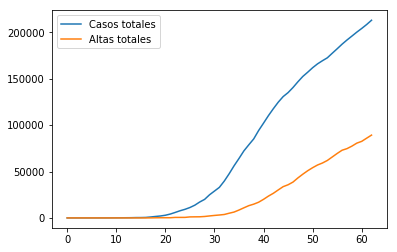

In [6]:
casosTotales = pd.DataFrame(casosTotales)
altasTotales = pd.DataFrame(altasTotales)
totalSpaña = concatDF(casosTotales,altasTotales)
totalSpaña.columns = ["Casos totales","Altas totales"]
totalSpaña.plot()

#### NUEVOS CASOS Y ALTAS DIARIOS
##### Se representa altas + fallecidos porque cuando superen a los contagios diarios, los casos activos descenderán

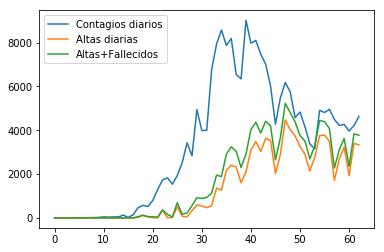

In [7]:
nuevosCasos = pd.DataFrame(nuevosCasos)
nuevasAltas = pd.DataFrame(nuevasAltas)
altasFallecidos= pd.DataFrame(altasFallecidos)
datosDiarios = concatDF(nuevosCasos,concatDF(nuevasAltas,altasFallecidos))
datosDiarios.columns = ["Contagios diarios","Altas diarias","Altas+Fallecidos"]
datosDiarios.plot()

# CASOS ACTIVOS 
#### casos activos = contagios - (altas+fallecidos)

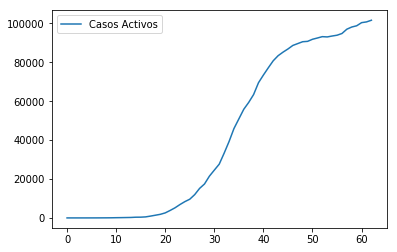

In [8]:
casosActivos = pd.DataFrame(casosActivos)
casosActivos.columns = ["Casos Activos"]
casosActivos.plot()

#### HISTÓRICO
###### Últimos 10 días

In [9]:
totalhistorico.tail(10)

,Casos Totales,Casos diarios,porcentaje,Altas Totales,Altas diarios,porcentaje
53,172552,3148,1.858280,61924,2759,4.663230
54,177464,4912,2.846678,65682,3758,6.068729
55,182273,4809,2.709845,69461,3779,5.753479
56,187230,4957,2.719547,72952,3491,5.025842
57,191726,4496,2.401325,74662,1710,2.344007
58,195944,4218,2.200015,77357,2695,3.609601
59,200210,4266,2.177153,80587,3230,4.175446
60,204178,3968,1.981919,82514,1927,2.391205
61,208389,4211,2.062416,85915,3401,4.121725
62,213024,4635,2.224206,89250,3335,3.881744


## Madrid y Cataluña 

### Casos totales

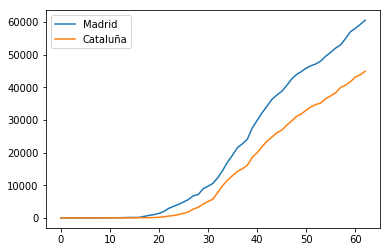

In [10]:
df1 = pd.DataFrame(mdCasos)
df2 = pd.DataFrame(ctCasos)
madCat = concatDF(df1,df2)
madCat.columns =['Madrid','Cataluña']
madCat.plot()

### Casos diarios 

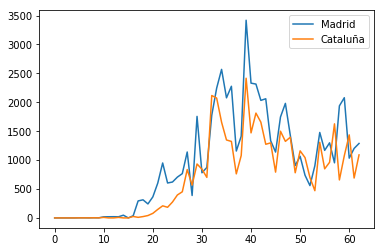

In [11]:
df1 = pd.DataFrame(mdnew)
df2 = pd.DataFrame(ctnew)
madCat = concatDF(df1,df2)
madCat.columns =['Madrid','Cataluña']
madCat.plot()

### Histórico Madrid y Cataluña
##### Últimos 10 días

In [12]:
madCat = concatDF(mdhistorico,cthistorico)
madCat.columns= ['Casos Madrid', 'Diarios Madrid', '% Madrid','Altas Madrid', 'Diarias Madrid', '% Madrid','Casos Cataluña', 'Diarios Cataluña', '% Cataluña','Altas Cataluña', 'Diarias Cataluña', '% Cataluña']
madCat.tail(10)

,Casos Madrid,Diarios Madrid,% Madrid,Altas Madrid,Diarias Madrid,% Madrid,Casos Cataluña,Diarios Cataluña,% Cataluña,Altas Cataluña,Diarias Cataluña,% Cataluña
53,48048,902,1.913206,26247,862,3.395706,35197,471,1.356332,10387,347,3.456175
54,49526,1478,3.076091,27433,1186,4.518612,36505,1308,3.716226,11480,1093,10.522769
55,50694,1168,2.358357,28491,1058,3.856669,37354,849,2.325709,11961,481,4.189895
56,51993,1299,2.562433,29436,945,3.316837,38316,962,2.575360,12787,826,6.905777
57,52946,953,1.832939,30475,1039,3.529692,39943,1627,4.246268,13275,488,3.816376
58,54884,1938,3.660333,31313,838,2.749795,40600,657,1.644844,13691,416,3.133710
59,56963,2079,3.787989,31762,449,1.433909,41676,1076,2.650246,13934,243,1.774889
60,57997,1034,1.815213,32277,515,1.621434,43112,1436,3.445628,14446,512,3.674465
61,59199,1202,2.072521,33032,755,2.339127,43802,690,1.600482,15089,643,4.451059
62,60487,1288,2.175712,33645,613,1.855776,44892,1090,2.488471,15477,388,2.571410


# Curvas por CCAA

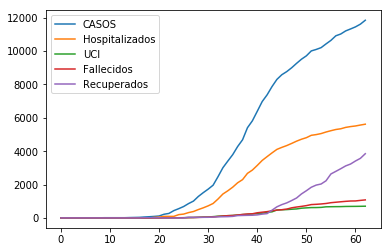

In [13]:
andalucia.plot()

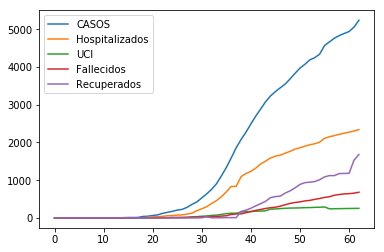

In [14]:
aragon.plot()

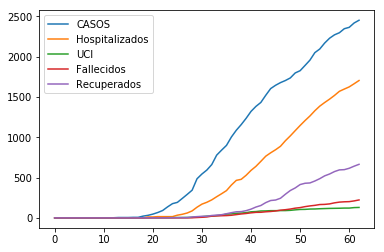

In [15]:
asturias.plot()

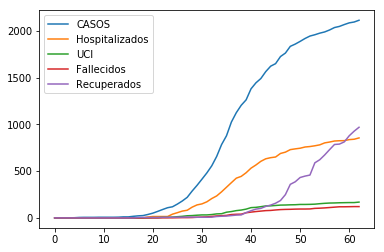

In [16]:
canarias.plot()

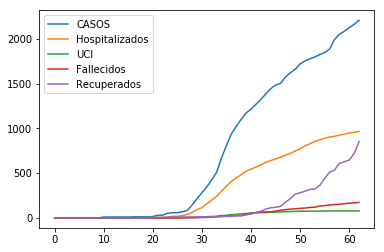

In [17]:
cantabira.plot()

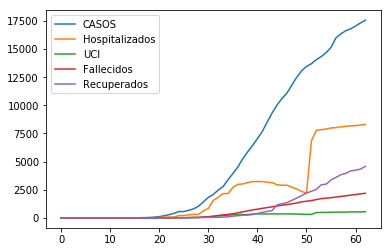

In [18]:
castillaMancha.plot()

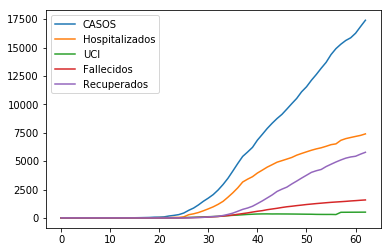

In [19]:
castillaLeon.plot()

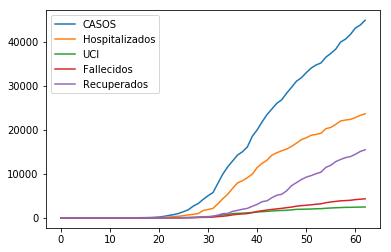

In [20]:
cataluna.plot()

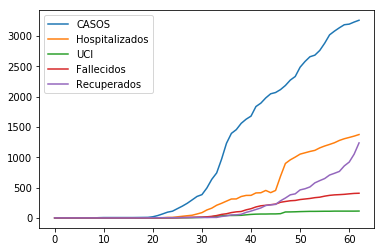

In [21]:
extremadura.plot()

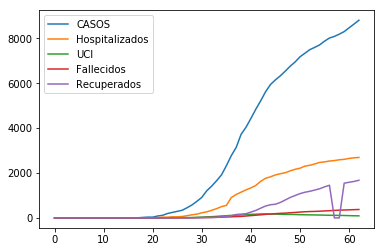

In [22]:
galicia.plot()

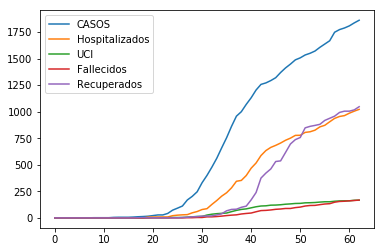

In [23]:
baleares.plot()

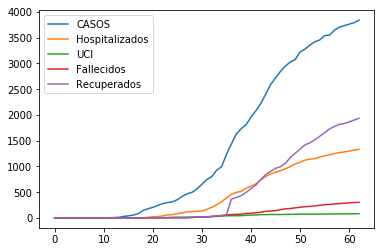

In [24]:
rioja.plot()

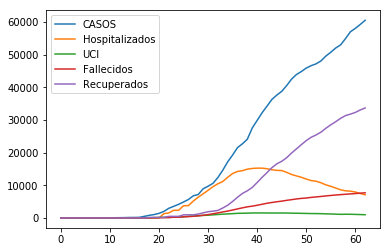

In [25]:
madrid.plot()

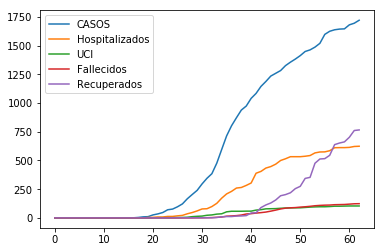

In [26]:
murcia.plot()

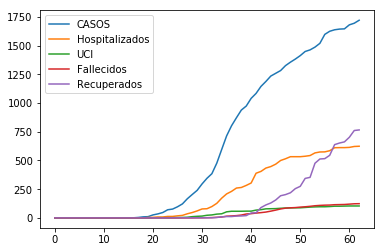

In [27]:
murcia.plot()

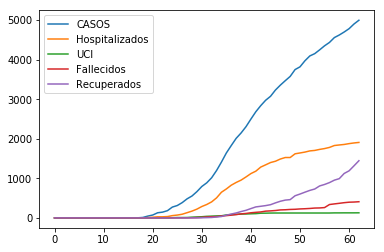

In [28]:
navarra.plot()

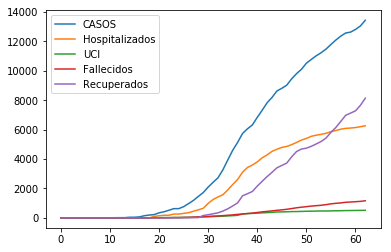

In [29]:
paisVasco.plot()

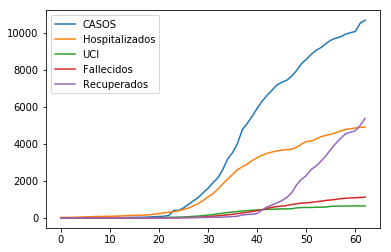

In [30]:
valencia.plot()

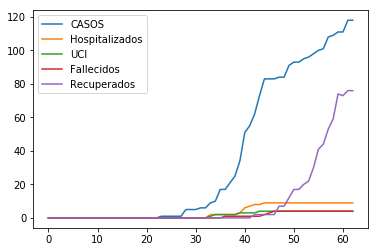

In [31]:
ceuta.plot()

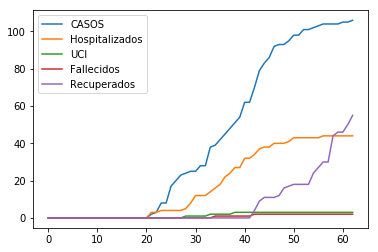

In [32]:
melilla.plot()